# Lab: Logistic Regression, LDA, QDA, and KNN

In [14]:
library(ISLR)
library(MASS)
library(repr)
options(repr.plot.width=5, repr.plot.height=4)

In [3]:
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [4]:
head(Smarket)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [5]:
dim(Smarket)

[1] 1250    9

In [6]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

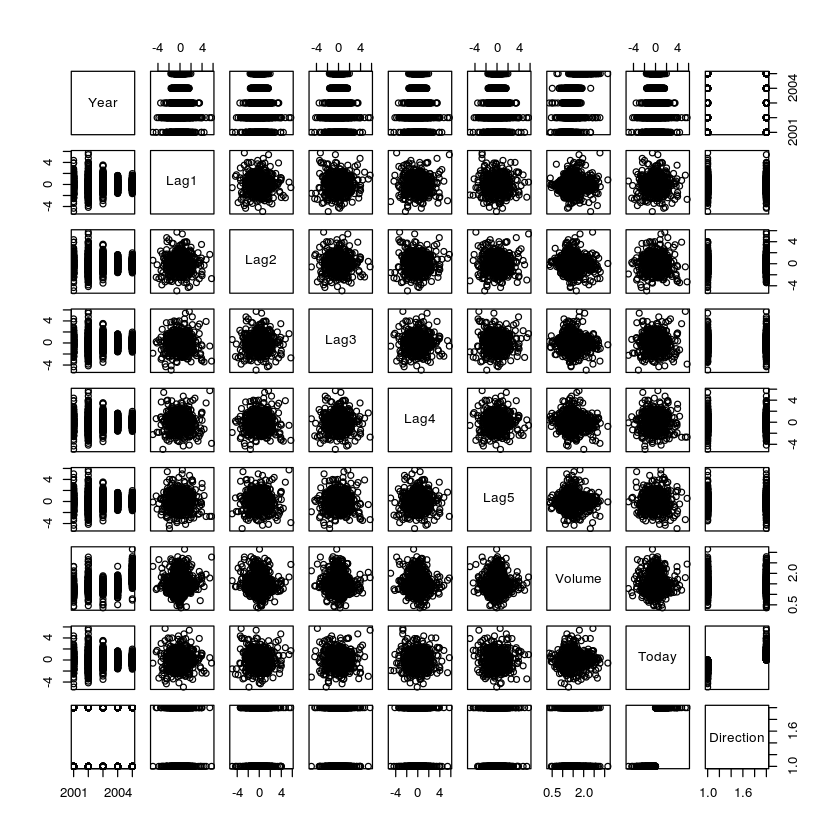

In [7]:
pairs(Smarket)

In [8]:
cor(Smarket) # error because direction is quantitative

ERROR: Error in cor(Smarket): 'x' must be numeric


In [9]:
cor(Smarket[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



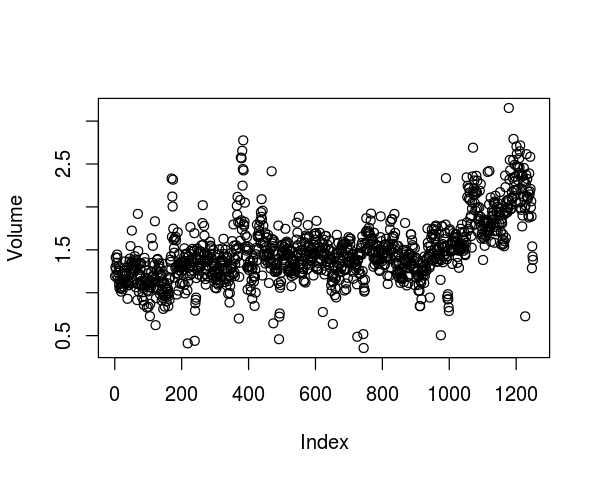

In [15]:
attach(Smarket)
plot(Volume)

# Logistic Regression
__Predict `Direction` using `Lag1`-`Lag5` and `Volume`__

In [16]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


__Here the smallest p-value is Lag1. The negative coefficient suggests that if the market had a postive return the previous day then it is less likely to go up today__

In [18]:
summary(glm.fit)$coef
# coef(glm.fit) to get the coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


In [22]:
summary(glm.fit)$coef[,4] # get just the p-values

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

In [27]:
contrasts(Direction) # see what R has coded for a particular cat. var

,Up
Down,0
Up,1


In [28]:
glm.probs = predict(glm.fit, type="response")
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [33]:
glm.pred = rep("Down", 1250) # create a vector of length 1250
glm.pred[glm.probs > 0.5] = "Up" # assign correct class based on probs

In [34]:
# create confusion matrix
table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [35]:
(507+145)/1250

[1] 0.5216

In [36]:
mean(glm.pred==Direction)

[1] 0.5216

In [37]:
100-52.2 # training error rate

[1] 47.8

In [41]:
train = (Year < 2005)
Smarket.2005 = Smarket[!train,]
dim(Smarket.2005)
Direction.2005 = Direction[!train]

[1] 252   9

In [42]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)
glm.probs = predict(glm.fit, Smarket.2005, type="response")

In [46]:
glm.pred = rep("Down", 252)
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Direction.2005)
mean(glm.pred == Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] 0.4801587

In [45]:
mean(glm.pred != Direction.2005)

[1] 0.5198413

In [47]:
glm.fit = glm(Direction~Lag1+Lag2, data=Smarket, family=binomial, subset=train)
glm.probs = predict(glm.fit, Smarket.2005, type="response")
glm.pred = rep("Down", 252)
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Direction.2005)
mean(glm.pred == Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

In [48]:
106/(106+76)

[1] 0.5824176

In [49]:
# predicting for particular values of Lag1 / Lag2
predict(glm.fit, newdata = data.frame(Lag1=c(1.2,1.5), Lag2=c(1.1,-0.8)), type="response")

1         2 
0.4791462 0.4960939

# Linear Discriminant Analysis

In [51]:
lda.fit = lda(Direction~Lag1+Lag2, data=Smarket, subset=train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

In [52]:
lda.pred = predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

In [54]:
lda.class = lda.pred$class
table(lda.class, Direction.2005)
mean(lda.class == Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

In [56]:
sum(lda.pred$posterior[,1] >= 0.5)
sum(lda.pred$posterior[,1] < 0.5)

[1] 70

[1] 182

In [62]:
lda.pred$posterior[1:20,1]
lda.class[1:20]

999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331

[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up

In [63]:
# different threshold
sum(lda.pred$posterior[,1] > 0.9)

[1] 0

# Quadratic Discriminant Analysis

In [64]:
qda.fit = qda(Direction~Lag1+Lag2, data=Smarket, subset=train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [65]:
qda.class = predict(qda.fit, Smarket.2005)$class
table(qda.class, Direction.2005)


         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

In [66]:
mean(qda.class == Direction.2005)

[1] 0.5992063

# K-Nearest Neighbors


In [67]:
library(class)
train.X = cbind(Lag1,Lag2)[train,]
test.X = cbind(Lag1,Lag2)[!train,]
train.Direction = Direction[train]

In [68]:
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k=1)
table(knn.pred, Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

In [78]:
length(Direction.2005)

[1] 252

In [79]:
(83+43)/252

[1] 0.5

In [80]:
knn.pred = knn(train.X, test.X, train.Direction, k=3)
table(knn.pred, Direction.2005)
mean(knn.pred == Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

[1] 0.5357143

# Application to Caravan Insurance Data

In [81]:
dim(Caravan)
attach(Caravan)
summary(Purchase)

[1] 5822   86

No  Yes 
5474  348

In [82]:
348/5822

[1] 0.05977327

In [83]:
standardized.X = scale(Caravan[,-86])
var(Caravan[,1])
var(Caravan[,2])
var(standardized.X[,1])
var(standardized.X[,2])

[1] 165.0378

[1] 0.1647078

[1] 1

[1] 1

In [85]:
test = 1:1000
train.X = standardized.X[-test,]
test.X = standardized.X[test,]
train.Y = Purchase[-test]
test.Y = Purchase[test]
set.seed(1)
knn.pred = knn(train.X, test.X, train.Y, k=1)
mean(test.Y != knn.pred)
mean(test.Y != "No")

[1] 0.118

[1] 0.059

In [86]:
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

In [87]:
9/(68+9)

[1] 0.1168831

In [88]:
knn.pred = knn(train.X, test.X, train.Y, k=3)
table(knn.pred, test.Y)


        test.Y
knn.pred  No Yes
     No  920  54
     Yes  21   5

In [89]:
5/26

[1] 0.1923077

In [90]:
knn.pred = knn(train.X, test.X, train.Y, k=5)
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4

In [91]:
4/15

[1] 0.2666667